# Breast Cancer Exploratory Data Analysis

__Importing libraries__

In [1]:
# Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


__Load the data__

In [0]:
# load the data using sklearn API
from sklearn.datasets import load_breast_cancer
bunch = load_breast_cancer()

In [3]:
bunch.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

---

## Preliminary

Let's look at the description about this dataset, by accessing bunch with 'DESCR' as the key.

In [4]:
print(bunch['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Now, we will look at the feature matrix. Then, we will create the corresponding DataFrame.

In [5]:
# accessing feature matrix
feature_matrix = bunch['data']
feature_matrix[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [6]:
# the shape of our feature matrix
print('feature_matrix.shape', feature_matrix.shape)

feature_matrix.shape (569, 30)


In [7]:
df = pd.DataFrame(feature_matrix, columns=bunch['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Before moving further to Exploratory Data Analysis and Predictive Modeling, we have to perform some validation whether our data consists of some peculiarities, that will interfere EDA and Predictive Modeling. Those peculiarities probably missing values, inconsistent data type, outliers, or inconsistent (peculiar) values.

We look at the basic information for this dataset also all of its columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Just like the information we read on 'DESCR'. This dataset has no missing values. But, it's a good measure to always be sure. Also, note that every column in this dataset has type float (numeric).

---

## Exploratory Data Analysis

Now, we will look at the bigger picture of the distribution for each column.

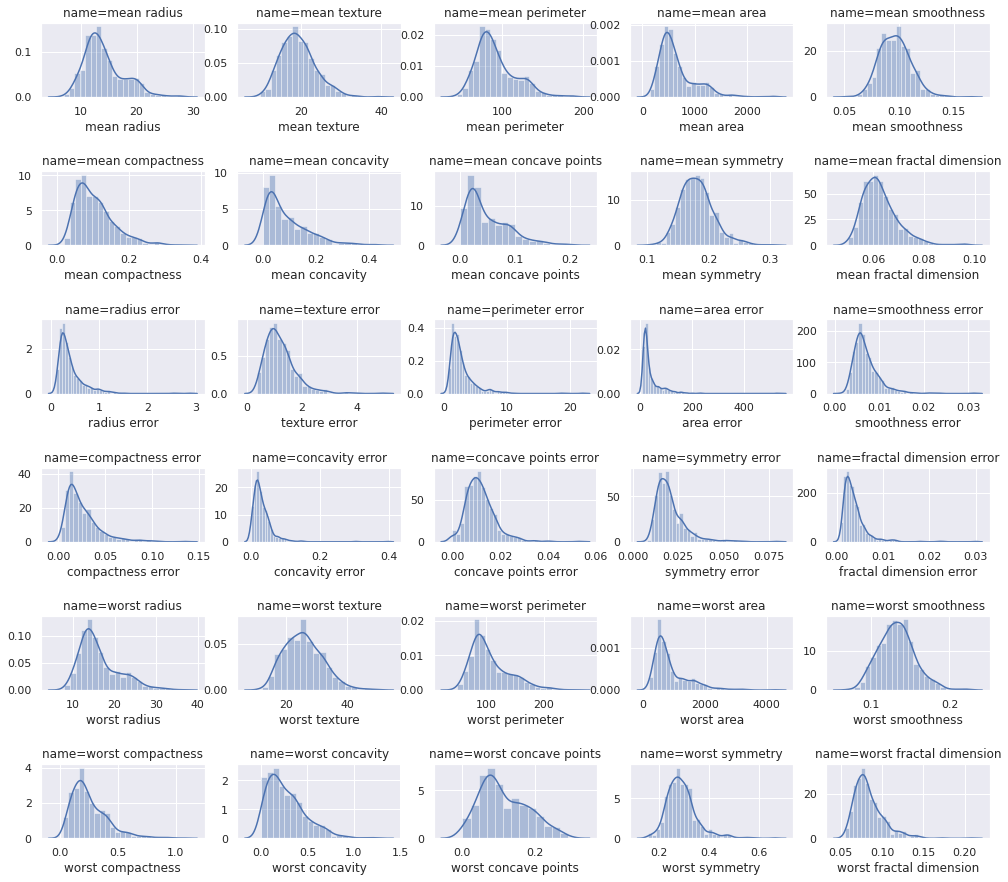

In [9]:
fig, axes = plt.subplots(6, 5, figsize=(17, 15))
fig.subplots_adjust(hspace=1)

for (ax, col) in zip(axes.ravel(), df.columns):
    sns.distplot(df[col], ax=ax)
    ax.set_title('name={}'.format(col))

In [0]:
# a function to create Empirical Cumulative Distribution Function
def ecdf(x):
    n = x.size
    x = np.sort(x)
    y = np.arange(1, n+1) / n

    return x, y

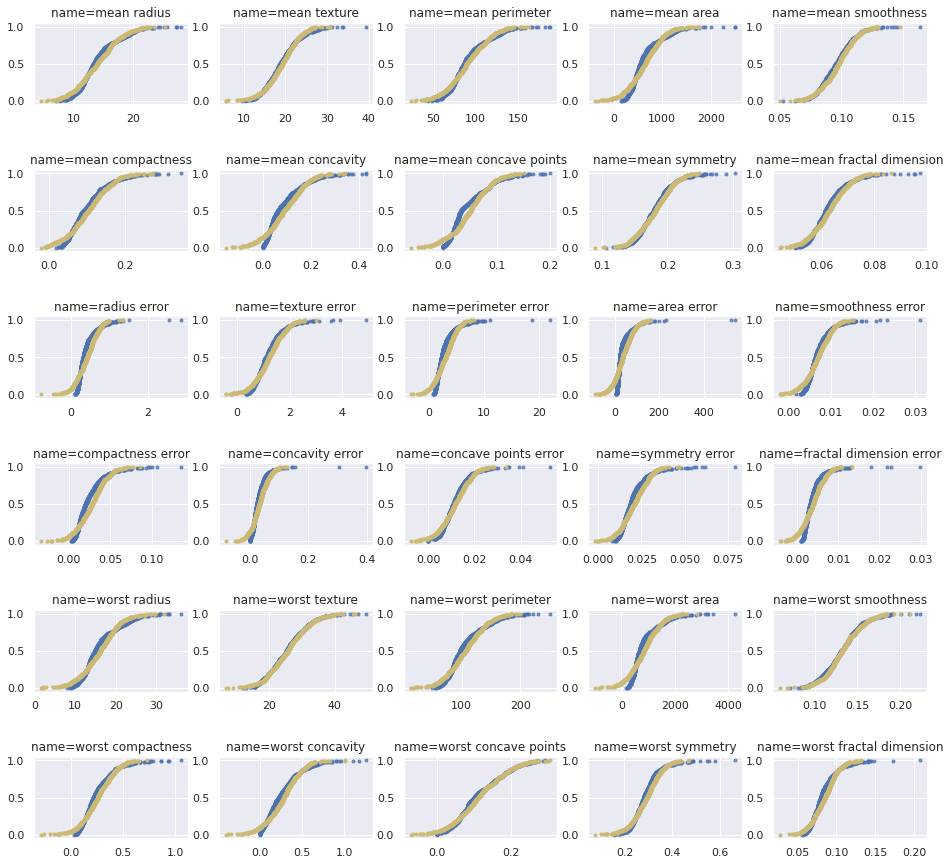

In [11]:
fig, axes = plt.subplots(6, 5, figsize=(16, 15))
fig.subplots_adjust(hspace=0.8)

for (col, ax) in zip(df.columns, axes.ravel()):
    x, y = ecdf(df[col])
    normal = np.random.normal(x.mean(), x.std(), size=df[col].size)
    x_norm, y_norm = ecdf(normal)
    ax.plot(x, y, '.b', alpha=0.75)
    ax.plot(x_norm, y_norm, '.y')
    ax.set_title(f"name={col}")

We have seen the plots of probability mass function and empirical cumulative distribution function. Some are close to normal distribution, but mainly, they differ pretty large. So, one of suitable approaches probably to transform the data before training the machine learning model. We will look whether this guess is right or not later.

To check for the existence of outliers, we will create box plots.

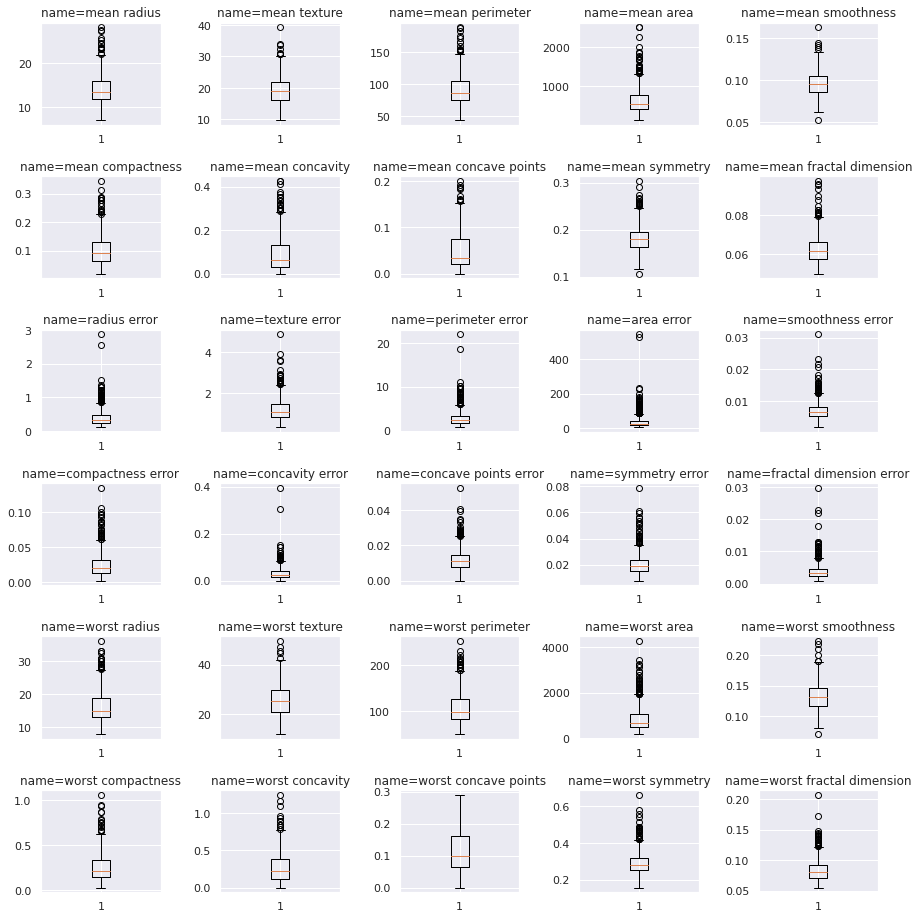

In [12]:
fig, axes = plt.subplots(6, 5, figsize=(15, 16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for (col, ax) in zip(df.columns, axes.ravel()):
    ax.boxplot(df[col])
    ax.set_title(f"name={col}")

Based on the plot above, we see that there are quite many data points beyond 1.5 interquartile range (the default for box plot). What we should do about it? First, we have to know how much this data points are.

In [13]:
# get the first and third quantile
df.quantile([0.25, 0.75])

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0.25,11.70,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.05770,0.2324,0.8339,1.606,17.85,0.005169,0.01308,0.01509,0.007638,0.01516,0.002248,13.01,21.08,84.11,515.3,0.1166,0.1472,0.1145,0.06493,0.2504,0.07146
0.75,15.78,21.80,104.10,782.7,0.10530,0.13040,0.13070,0.07400,0.1957,0.06612,0.4789,1.4740,3.357,45.19,0.008146,0.03245,0.04205,0.014710,0.02348,0.004558,18.79,29.72,125.40,1084.0,0.1460,0.3391,0.3829,0.16140,0.3179,0.09208


In [0]:
def count_outliers(df, width=1.5):
    iqr = df.quantile(0.75) - df.quantile(0.25)
    outliers_boundary = width * iqr
    less_than_mask = df < df.median() - outliers_boundary
    greater_than_mask = df > df.median() + outliers_boundary
    return (less_than_mask | greater_than_mask).sum(), (less_than_mask | greater_than_mask).mean()

In [29]:
# we set outlier's range equal to 1.5 (the default)
outliers_count, outliers_fq = count_outliers(df)
outliers_fq.sort_values(ascending=False)

area error                 0.172232
worst area                 0.140598
mean area                  0.130053
radius error               0.123023
perimeter error            0.105448
mean radius                0.103691
worst radius               0.101933
mean perimeter             0.096661
worst perimeter            0.094903
symmetry error             0.089631
compactness error          0.087873
smoothness error           0.087873
fractal dimension error    0.087873
concave points error       0.086116
mean concavity             0.086116
worst symmetry             0.079086
worst fractal dimension    0.075571
mean compactness           0.073814
worst compactness          0.072056
concavity error            0.072056
worst concavity            0.072056
mean concave points        0.070299
texture error              0.066784
mean symmetry              0.065026
mean fractal dimension     0.061511
worst smoothness           0.052724
mean texture               0.052724
worst concave points       0

Above we get the number of outliers (1.5 * interquartile range) for each column. Let's visualize it with barchart.

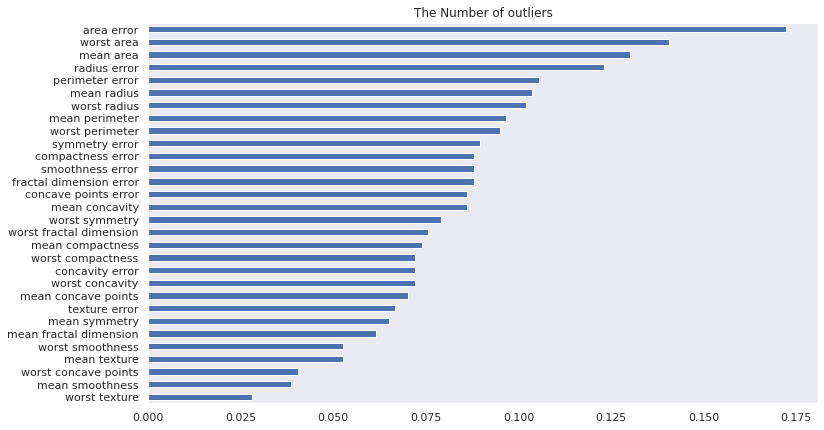

In [26]:
plt.figure(figsize=(12, 7))
outliers_fq.sort_values().plot(kind='barh')
ax = plt.gca()
ax.grid(False)
ax.set_title('The Number of outliers');

We get approximately 17% of our data points in column 'area error' are outliers. Now, let's try if we set the width of whisker larger.

In [32]:
# we set the width of the whisker to 2
outliers_count, outliers_fq = count_outliers(df, width=2)
outliers_fq.sort_values(ascending=False)

area error                 0.128295
radius error               0.080844
perimeter error            0.073814
worst area                 0.072056
mean area                  0.063269
compactness error          0.057996
smoothness error           0.056239
fractal dimension error    0.052724
symmetry error             0.049209
concavity error            0.047452
worst fractal dimension    0.043937
worst symmetry             0.040422
mean concavity             0.036907
texture error              0.036907
worst radius               0.035149
concave points error       0.035149
mean compactness           0.035149
worst perimeter            0.035149
worst compactness          0.035149
mean concave points        0.033392
mean radius                0.031634
mean fractal dimension     0.029877
mean perimeter             0.028120
mean symmetry              0.026362
worst concavity            0.024605
worst smoothness           0.012302
mean texture               0.012302
mean smoothness            0

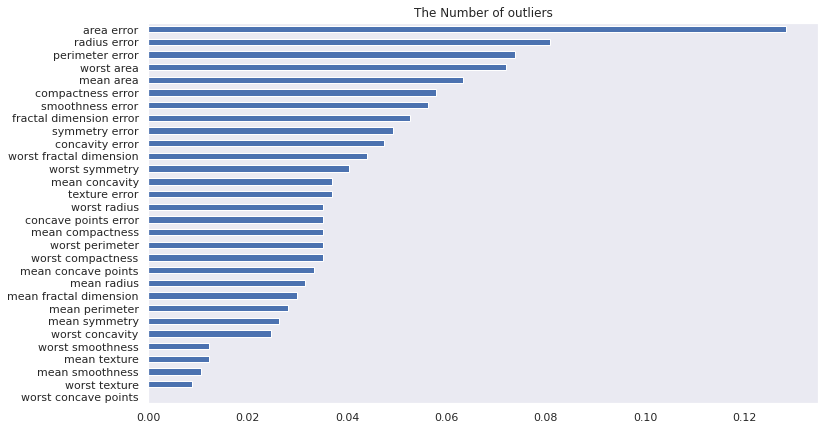

In [33]:
plt.figure(figsize=(12, 7))
outliers_fq.sort_values().plot(kind='barh')
ax = plt.gca()
ax.grid(False)
ax.set_title('The Number of outliers');

When we set the whisker's width equal to 2, we get 12% outliers in column 'area error'. There are several reasons behind this, it could be the distribution of 'area error' is indeed wide and mainly larger than the median or data entry errors. But, let's say that the data tells the truth.